2. Logistic Regression: You are given a dataset named football.csv containing information about football players. Your task is to build a machine learning model to classify whether a player’s contribution type is more inclined towards being type 1 or 0, where 1 indicates players with contributions in the attacking half of the football field and 0 indicates players with contributions in the defending half of the field. The classification column is “contribution type”.

 (a) Train a Logistic Regression model using the training data. Implement logistic regression from scratch. You’re NOT ALLOWED to use sklearn for this question.

 (b) Make predictions on the test data using the trained model.

 (c) Calculate the F1 score, accuracy score, and confusion matrix to evaluate the model’s performance.

In [94]:
#Data Preprocessing
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp


path_link = "/content/drive/MyDrive/ML 1st half Tutorials/Assignment1/football.csv"
df = pd.read_csv(path_link)
df = df.drop(['club_team_id','club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

median_value = df['value_eur'].median()
df['value_eur'].fillna(value=median_value,inplace=True)

median_value = df['wage_eur'].median()
df['wage_eur'].fillna(value=median_value,inplace=True)

median_value = df['league_level'].median()
df['league_level'].fillna(value=median_value,inplace=True)

median_value = df['release_clause_eur'].median()
df['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = df['pace'].median()
df['pace'].fillna(value=median_value,inplace=True)

median_value = df['shooting'].median()
df['shooting'].fillna(value=median_value,inplace=True)

median_value = df['passing'].median()
df['passing'].fillna(value=median_value,inplace=True)

median_value = df['dribbling'].median()
df['dribbling'].fillna(value=median_value,inplace=True)

median_value = df['defending'].median()
df['defending'].fillna(value=median_value,inplace=True)

median_value = df['physic'].median()
df['physic'].fillna(value=median_value,inplace=True)

median_value = df['goalkeeping_speed'].median()
df['goalkeeping_speed'].fillna(value=median_value,inplace=True)

df.info()

class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

for feature in df.columns:
    df[feature] = df[feature].apply(Standardizer(df[feature].mean(), df[feature].std()).scale)

df.sample(frac=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7772 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  relea

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
2340,0.526854,1.140855,0.044892,0.120139,-1.107800,1.241094,0.915709,-0.472109,0.001877,0.691129,...,-0.828205,-1.111096,-1.343765,-0.509505,-0.337490,-0.339582,-0.279514,-0.391660,0.048755,1.09161
6311,-0.817437,0.811665,-0.280882,-0.407663,-1.570880,0.366656,-0.219656,-0.472109,0.001877,0.691129,...,-0.726436,-0.967649,-0.616934,-0.394910,-0.516602,-0.216876,-0.454209,-0.447656,0.048755,1.09161
2065,0.526854,0.317881,-0.223393,-0.285862,0.281441,0.658135,1.341471,0.846336,-1.456849,-1.857603,...,-2.151195,-1.971776,-1.876774,3.329414,3.304452,2.912140,3.039681,3.304119,1.331076,-0.91596
6736,-0.985474,-0.011309,-0.319209,-0.367062,-1.339340,1.678313,1.483391,2.164782,0.001877,-0.583237,...,0.494786,0.658079,0.691362,-0.108424,-0.516602,-0.155522,-0.628903,-0.111676,0.048755,-0.91596
2828,0.190781,-0.340499,-0.397778,-0.407663,2.133762,0.949615,2.051074,-0.472109,-1.456849,-1.857603,...,-1.235279,-1.971776,-1.537586,3.100224,3.065636,3.709732,3.156144,2.856146,0.048755,-0.91596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,-1.153510,0.647070,-0.326395,-0.245262,-1.570880,0.366656,-1.355020,2.164782,-1.456849,-0.583237,...,0.036828,0.658079,0.594452,-0.223019,-0.337490,-0.400935,-0.570672,-0.055680,0.048755,-0.91596
5068,-0.481364,-0.175904,-0.309627,-0.407663,-0.413179,0.075176,0.064186,-0.472109,0.001877,-0.583237,...,0.647438,0.562448,0.642907,-0.051127,-0.038970,-0.094169,-0.046588,0.000317,0.048755,-0.91596
5251,-0.481364,0.153286,-0.261719,-0.326462,-1.107800,-1.090742,-0.503497,0.846336,-1.456849,-0.583237,...,0.494786,0.562448,0.594452,-0.108424,-0.576306,-0.584995,-0.279514,-0.055680,0.048755,-0.91596
6132,-0.817437,-0.505093,-0.335976,-0.450293,-0.644720,-0.070563,-0.077735,-0.472109,0.001877,0.691129,...,0.240365,0.419001,0.400630,0.006171,-0.038970,-0.094169,-0.395977,-0.503653,0.048755,-0.91596


In [95]:
# Define feature matrix X_log and also target vector Y_log
X_log = df.drop("contribution_type", axis=1)
Y_log = df["contribution_type"]

# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_log, Y_log, test_size=0.2, random_state=101)

X_log

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,4.055620,3.445182,7.058628,12.503183,1.670682,-1.673701,-0.503497,-0.472109,1.460603,1.965495,...,3.126814,-1.591468,-0.824203,-1.246854,-0.566802,-0.277786,-0.032816,-0.104820,-0.447656,0.048755
1,3.887583,3.280587,11.034994,10.473176,1.207602,0.512396,0.773789,-0.472109,1.460603,1.965495,...,2.391811,-0.828205,-0.489494,-1.489131,-0.051127,-0.576306,-0.216876,-0.454209,-0.335663,0.048755
2,3.719547,3.115992,3.896698,10.473176,2.133762,0.803875,1.057630,-0.472109,1.460603,3.239861,...,3.034939,-1.387931,-0.967649,-1.246854,-0.509505,-0.277786,-0.032816,-0.104820,-0.279666,0.048755
3,3.719547,3.115992,11.945246,10.473176,0.512981,-0.945002,-1.071179,-0.472109,2.919330,3.239861,...,2.851188,-0.828205,-0.967649,-1.004577,-0.394910,-0.397194,-0.032816,-0.046588,-0.279666,0.048755
4,3.719547,3.115992,11.609890,13.721187,0.744521,-0.070563,-0.787338,-0.472109,2.919330,1.965495,...,2.483686,0.850975,0.610263,0.158353,-0.051127,-0.158378,-0.646348,-0.337746,-0.167673,0.048755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,-3.001911,-1.328067,-0.401610,-0.468563,-1.570880,-1.090742,-0.787338,-0.472109,0.001877,-0.583237,...,-1.375081,-1.845889,-1.397989,-1.198399,-0.051127,-0.337490,-0.462289,-0.046588,-0.615646,0.048755
7768,-3.169948,-3.138610,-0.409276,-0.468563,-0.413179,-0.362043,-0.787338,-0.472109,0.001877,-0.583237,...,-1.558832,-0.573783,-0.346047,-0.374657,-0.223019,-0.337490,-0.094169,-0.163051,-0.055680,0.048755
7769,-3.169948,-1.986447,-0.405443,-0.448263,-1.339340,-0.945002,-1.496941,-0.472109,0.001877,-0.583237,...,-1.926334,-0.014057,-0.011339,0.158353,-0.509505,-0.337490,-0.584995,-0.337746,-0.503653,0.048755
7770,-3.337984,-2.809420,-0.408318,-0.407663,-1.107800,0.366656,0.206106,-0.472109,-1.456849,-0.583237,...,-2.201960,-0.014057,-0.011339,0.158353,-0.051127,-0.158378,-0.155522,-0.221283,-0.559650,0.048755


In [96]:
# Add a bias term to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[ 1.00000000e+00 -6.49400786e-01  3.17880577e-01 ... -1.63051181e-01
  -2.79666245e-01  4.87552462e-02]
 [ 1.00000000e+00  6.94890839e-01  1.53285784e-01 ... -3.95977158e-01
  -5.03652854e-01  4.87552462e-02]
 [ 1.00000000e+00  1.19900020e+00  6.47070163e-01 ... -3.95977158e-01
   3.17016559e-04  4.87552462e-02]
 ...
 [ 1.00000000e+00  8.62927292e-01  3.17880577e-01 ...  3.38906997e+00
   3.30411950e+00 -3.15704656e+00]
 [ 1.00000000e+00  8.62927292e-01  6.47070163e-01 ... -3.37745664e-01
  -4.47656201e-01  4.87552462e-02]
 [ 1.00000000e+00 -4.81364332e-01 -9.98877767e-01 ... -2.79514170e-01
  -2.79666245e-01  4.87552462e-02]]
[[ 1.         -0.31332788 -0.83428297 ... -0.16305118 -0.39165955
   0.04875525]
 [ 1.          0.19078148  0.48247537 ... -0.62890314 -0.50365285
   0.04875525]
 [ 1.         -0.31332788 -0.83428297 ... -0.45420865 -0.22366959
   0.04875525]
 ...
 [ 1.          0.35881793 -0.01130901 ... -0.16305118 -0.16767294
   0.04875525]
 [ 1.          0.35881793 -0.175903

In [97]:
# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Initialize the weights and bias term
np.random.seed(0)
weights = np.random.rand(X_train.shape[1])
bias = 0

# Hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Training the Logistic Regression model
for epoch in range(num_epochs):
    # Compute the log-odds (logit)
    logit = np.dot(X_train, weights) + bias

    # Apply the sigmoid function
    predictions = sigmoid(logit)

    # Compute the gradient of the loss function with respect to weights and bias
    dw = (1 / len(Y_train)) * np.dot(X_train.T, (predictions - Y_train))
    db = (1 / len(Y_train)) * np.sum(predictions - Y_train)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

# Trained weights and bias are stored in 'weights' and 'bias' variables


In [98]:
# Compute the log-odds for the test data
logit_test = np.dot(X_test, weights) + bias

# Apply the sigmoid function to get predictions
predictions_test = sigmoid(logit_test)

# Threshold the predictions to get binary class labels (0 or 1)
y_pred = (predictions_test >= 0.5).astype(int)
Y_test = (Y_test >= 0.5).astype(int)


In [99]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


F1 Score: 0.8302405498281786
Accuracy: 0.8411575562700965
Confusion Matrix:
 [[704 146]
 [101 604]]


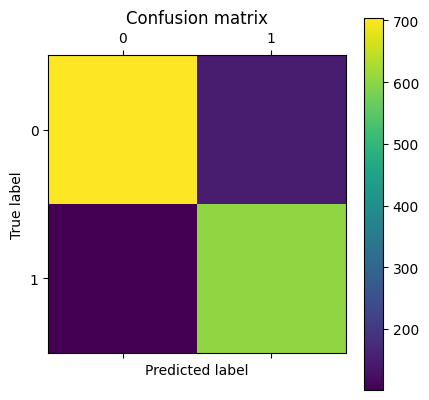

In [100]:
# Plot the Confusion Matrix
plt.matshow(conf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()